# PREVENTING BANK CUSTOMER CHURN! 
 # " Exploratory Data Analysis & Prediction!"
 [** by_Nancy Pandey** ]

### 1. Introduction
We aim to accomplist the following for this study:

1. Identify and visualize which factors contribute to customer churn:

2. Build a prediction model that will perform the following:

3. Classify if a customer is going to churn or not
 
 Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

### 2. Data review and preparation
In this section we will seek to explore the structure of our data:

1. To understand the input space the data set
2. And to prepare the sets for exploratory and prediction tasks as described in section 

In [1]:
#Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline


In [2]:
#Adding data
data_train= pd.read_csv("train_PDjVQMB.csv")
data_test=pd.read_csv("test_lTY72QC.csv")
data_submit=pd.read_csv("sample_OoSmYo5.csv")

In [3]:
print(data_test.shape)
print(data_train.shape)

(2851, 10)
(6650, 11)


In [4]:
df_churn= data_train.copy()
df_churn

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [5]:
#Lets do null checking first
df_churn.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [6]:
df_churn.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [7]:
df_churn.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

<AxesSubplot:xlabel='Age'>

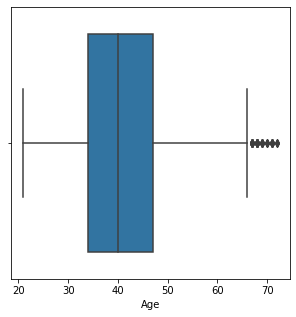

In [8]:
#Lets check for outliers
plt.figure(figsize=(5,5))
sns.boxplot(x='Age',data=df_churn)

<AxesSubplot:xlabel='Age'>

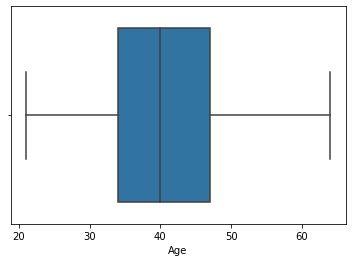

In [9]:
df_churn=df_churn[df_churn['Age'].values<65]
sns.boxplot(x='Age',data=df_churn)

<AxesSubplot:xlabel='Balance'>

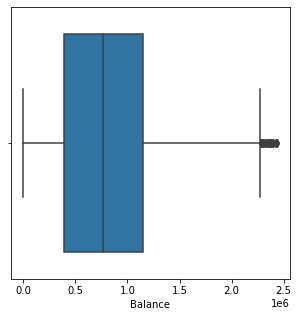

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Balance',data=df_churn)

<AxesSubplot:xlabel='Balance'>

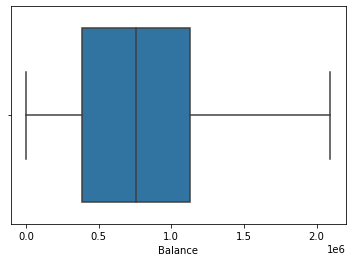

In [11]:
2500000
df_churn=df_churn[df_churn['Balance'].values<2100000]
sns.boxplot(x='Balance',data=df_churn)

Others have less than 10 unique values so not much of use to find the mean of them. We have to check there effect of churned predictions and lets first check the ratio of the churned and not churned record

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

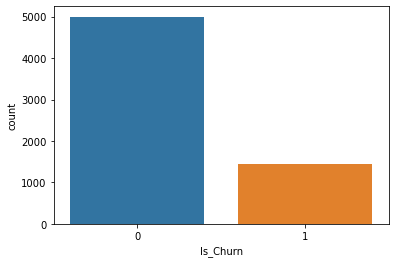

In [12]:
sns.countplot(x='Is_Churn',data=df_churn)

The data as we can see is imbalanced , so we ghave to use the imbalanced classification approach. SMOTE is widely used approach for imbalanced dataset. We dont have huge dataset so we will prefer to go for oversampling.

Our dataset have many columns with not more than 10 unique values, so columns that are of object type we will use **Label Encoder** to encode their value e.g. Income

In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_churn['Gender']=le.fit_transform(df_churn['Gender'])
df_churn['Income']= le.fit_transform(df_churn['Income'])
df_churn['Credit_Category']= le.fit_transform(df_churn['Credit_Category'])
df_churn.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,0,1,563266.44,4,0,1,0,0,1
1,57fea15e,53,0,2,875572.11,2,1,1,1,2,0
2,8df34ef3,35,0,3,701607.06,2,1,2,0,2,0
3,c5c0788b,43,0,3,1393922.16,0,1,2,1,2,1
4,951d69c4,39,0,3,893146.23,1,1,1,1,1,1


In [14]:
df_churn.dtypes

ID                     object
Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category         int32
Is_Churn                int64
dtype: object

In [15]:
df_churn['Product_Holdings']=df_churn['Product_Holdings'].str.extract('(\d+)')
df_churn['Product_Holdings']=df_churn['Product_Holdings'].astype('int64')
df_churn.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,0,1,563266.44,4,0,1,0,0,1
1,57fea15e,53,0,2,875572.11,2,1,1,1,2,0
2,8df34ef3,35,0,3,701607.06,2,1,2,0,2,0
3,c5c0788b,43,0,3,1393922.16,0,1,2,1,2,1
4,951d69c4,39,0,3,893146.23,1,1,1,1,1,1


<AxesSubplot:>

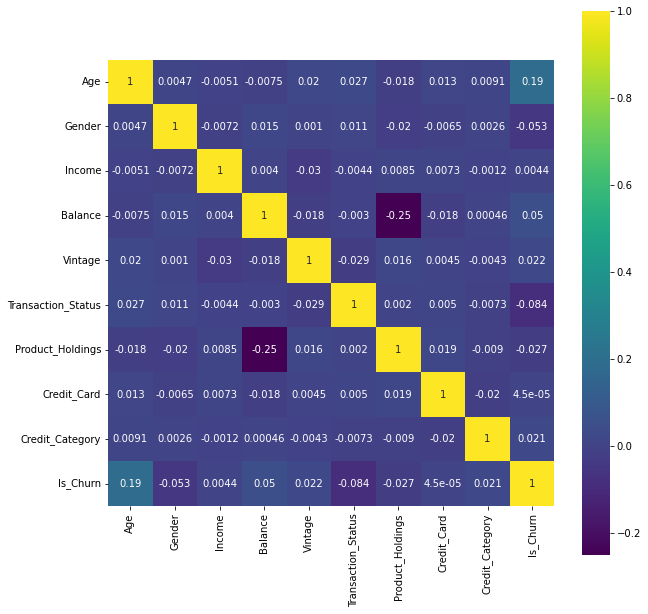

In [16]:
#lets check for correlation
corre= df_churn.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre, square=True, annot=True,cmap='viridis')

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

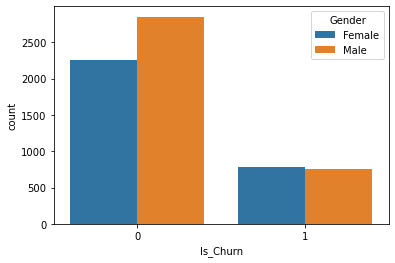

In [17]:
sns.countplot(x='Is_Churn', hue='Gender', data=data_train)


#### We can see male are in higher number when it came to retention of customer but people who are leaving have  almost equal number across gender

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

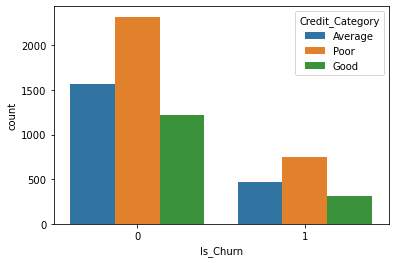

In [18]:
sns.countplot(x='Is_Churn', hue='Credit_Category', data=data_train)

#### in both churning and non-churning, people having poor credit score are on top. It might be the that people having poor credit category stick around with bank longer.


<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

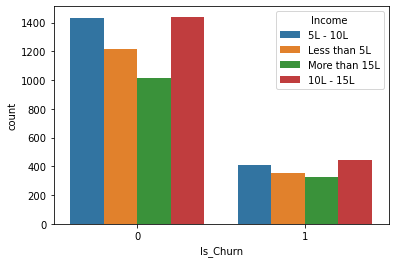

In [19]:
sns.countplot(x='Is_Churn', hue='Income', data=data_train)

#### As we can see people between 5L to 15L, people are higher retainer that are below 15L.

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

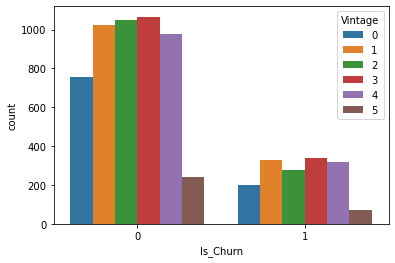

In [20]:
sns.countplot(x='Is_Churn', hue='Vintage', data=data_train)

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

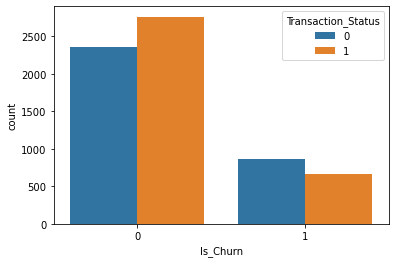

In [21]:
sns.countplot(x='Is_Churn', hue='Transaction_Status', data=data_train)

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

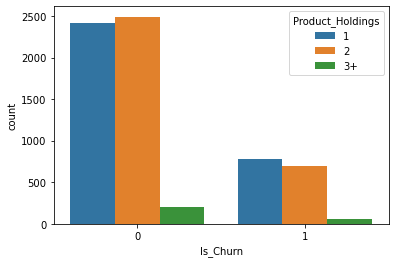

In [22]:
sns.countplot(x='Is_Churn', hue='Product_Holdings', data=data_train)

In [23]:
from sklearn.model_selection import train_test_split
feature=df_churn.drop(['ID','Is_Churn'], axis=1)
target=df_churn['Is_Churn']
x_train,x_test,y_train,y_test=train_test_split(feature,target, random_state=60, test_size=0.1)

In [24]:
#We will use SMOTE 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

#oversampling minority class using smote
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

#We will try SMOTEENN which will this method combines the SMOTE ability to generate synthetic examples for minority class 
#and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class.
smoten = SMOTEENN()
x_smoten, y_smoten = smoten.fit_resample(x_train, y_train)

#Oversample using Adaptive Synthetic (ADASYN) algorithm.
#This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.
ada = ADASYN(random_state=101)
x_res, y_res = ada.fit_resample(x_train, y_train)


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = metrics.roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = metrics.roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [16]:
from lazypredict.Supervised import LazyClassifier
# Lets first check using SMOTE
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_smote, x_test, y_smote, y_test)
print(models)

 90%|████████▉ | 26/29 [00:13<00:01,  1.63it/s]

[22:19:32] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:14<00:00,  2.01it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.62               0.56     0.56      0.65   
CalibratedClassifierCV             0.63               0.56     0.56      0.65   
LinearSVC                          0.62               0.56     0.56      0.64   
LinearDiscriminantAnalysis         0.62               0.56     0.56      0.64   
RidgeClassifierCV                  0.62               0.56     0.56      0.64   
RidgeClassifier                    0.62               0.56     0.56      0.64   
NearestCentroid                    0.62               0.56     0.56      0.64   
SVC                                0.65               0.55     0.55      0.67   
SGDClassifier                      0.59               0.55     0.55      0.62   
BernoulliNB                        0.62               0.55     0.55      0.64   
AdaBoostClassifier          

In [62]:
models1, predictions1 = clf.fit(x_smoten, x_test, y_smoten, y_test)
print(models1)

 97%|█████████▋| 28/29 [00:02<00:00, 12.88it/s]

[19:17:20] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:02<00:00, 13.03it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.64               0.60     0.60      0.66   
NearestCentroid                    0.63               0.57     0.57      0.65   
LogisticRegression                 0.61               0.56     0.56      0.64   
CalibratedClassifierCV             0.63               0.56     0.56      0.65   
GaussianNB                         0.63               0.55     0.55      0.65   
LinearSVC                          0.60               0.55     0.55      0.63   
RidgeClassifierCV                  0.60               0.55     0.55      0.63   
RidgeClassifier                    0.60               0.55     0.55      0.63   
LinearDiscriminantAnalysis         0.60               0.55     0.55      0.63   
BernoulliNB                        0.62               0.54     0.54      0.64   
ExtraTreesClassifier        

In [63]:
models2, predictions3 = clf.fit(x_res, x_test, y_res, y_test)
print(models2)

 93%|█████████▎| 27/29 [00:14<00:01,  1.51it/s]

[19:21:14] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:15<00:00,  1.90it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.62               0.57     0.57      0.65   
LGBMClassifier                     0.67               0.57     0.57      0.68   
PassiveAggressiveClassifier        0.68               0.57     0.57      0.69   
NearestCentroid                    0.62               0.57     0.57      0.65   
XGBClassifier                      0.67               0.56     0.56      0.68   
AdaBoostClassifier                 0.61               0.56     0.56      0.64   
LinearSVC                          0.61               0.56     0.56      0.64   
LogisticRegression                 0.61               0.56     0.56      0.64   
CalibratedClassifierCV             0.62               0.56     0.56      0.65   
RidgeClassifierCV                  0.61               0.56     0.56      0.64   
LinearDiscriminantAnalysis  

In [64]:
param_grid = { 
    'n_estimators': [50,100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [3, 5, 6, 7]
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5,refit=True, verbose=0)
CV_rfc.fit(x_res,y_res)
best_model(CV_rfc)

0.7287744545062116
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 150}
RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=6,
                       n_estimators=150)


In [36]:
rbn=RandomForestClassifier(criterion='gini', max_depth=8, max_features='log2', n_estimators=150, min_samples_split=6)
rbn.fit(x_smote,y_smote)
y_pred_gd=rbn.predict(x_test)
print(metrics.classification_report(y_test,y_pred_gd))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       502
           1       0.26      0.35      0.30       143

    accuracy                           0.64       645
   macro avg       0.53      0.53      0.53       645
weighted avg       0.68      0.64      0.65       645



In [17]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l1','l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(x_res,y_res)
best_model(log_primal_Grid)

0.5090631636719403
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)


In [18]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=0.1,dual=False, fit_intercept=True,intercept_scaling=1, max_iter=50, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None,tol=1e-05, verbose=0)
log_primal.fit(x_train,y_train)
y_pred_lr=log_primal.predict(x_test)
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       502
           1       0.00      0.00      0.00       143

    accuracy                           0.78       645
   macro avg       0.39      0.50      0.44       645
weighted avg       0.61      0.78      0.68       645



In [19]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_smote)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,y_smote)
best_model(log_pol2_Grid)

0.713428916447835
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=10, max_iter=300, solver='liblinear', tol=1e-06)


In [33]:
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_smote)
log_pol2 = LogisticRegression(C=10, class_weight='balanced', dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=1e-06, verbose=0, warm_start=False)
log_pol2.fit(x_smoten,y_smoten)
y_pred_lrp=log_pol2.predict(x_test)
print(metrics.classification_report(y_test,y_pred_lrp))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       502
           1       0.30      0.48      0.37       143

    accuracy                           0.64       645
   macro avg       0.56      0.58      0.56       645
weighted avg       0.71      0.64      0.66       645



In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(x_smote,y_smote)
best_model(SVM_grid)

In [34]:
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(x_res,y_res)
y_pred_svm=SVM_RBF.predict(x_test)
print(metrics.classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       502
           1       0.24      0.23      0.24       143

    accuracy                           0.67       645
   macro avg       0.51      0.51      0.51       645
weighted avg       0.66      0.67      0.67       645



In [ ]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[50,100,200,300]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(x_smote,y_smote)
best_model(xgb_grid)

In [27]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.001, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
XGB.fit(x_smote,y_smote)
y_pred_xg=XGB.predict(x_test)
print(metrics.classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       502
           1       0.27      0.31      0.29       143

    accuracy                           0.66       645
   macro avg       0.53      0.54      0.53       645
weighted avg       0.68      0.66      0.67       645



In [30]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
knn.fit(x_smote, y_smote)
best_model(knn)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.6282313681868743
{'n_neighbors': 11}
KNeighborsClassifier(n_neighbors=11)


In [31]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_smote,y_smote)
y_pred_nn= knn.predict(x_test)
print(metrics.classification_report(y_test,y_pred_nn))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       502
           1       0.25      0.47      0.33       143

    accuracy                           0.58       645
   macro avg       0.53      0.54      0.51       645
weighted avg       0.68      0.58      0.61       645



In [37]:
from sklearn.ensemble import VotingClassifier
clf1 = log_pol2
clf2=rbn
clf3=knn
clf4 = SVM_RBF
clf5 = XGB
eclf1 = VotingClassifier(estimators=[('Lr',clf1),('rbn',clf2),('knn',clf3)], voting='soft')
eclf1.fit(x_smote, y_smote)
predictions = eclf1.predict(x_test)
print("Final Accuracy Score ")
print(metrics.classification_report(y_test, predictions))

Final Accuracy Score 
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       502
           1       0.29      0.43      0.35       143

    accuracy                           0.65       645
   macro avg       0.55      0.57      0.55       645
weighted avg       0.70      0.65      0.67       645



In [38]:
data_test['Gender']=le.fit_transform(data_test['Gender'])
data_test['Income']= le.fit_transform(data_test['Income'])
data_test['Credit_Category']= le.fit_transform(data_test['Credit_Category'])
data_test['Product_Holdings']=data_test['Product_Holdings'].str.extract('(\d+)')
data_test['Product_Holdings']=data_test['Product_Holdings'].astype('int64')
test_row_id=data_test['ID']
testing=data_test.drop('ID', axis=1)
final_predictions=XGB.predict(testing)
data={'ID':test_row_id,'Is_Churn':final_predictions}
submit=pd.DataFrame(data)
submit.head()

submit.to_csv('submitbankfinal.csv', index=False)